<a href="https://colab.research.google.com/github/uvoyager/exoplanet_analysis/blob/main/exoplanets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub


In [ ]:
path = kagglehub.dataset_download("adityamishraml/nasaexoplanets")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nasaexoplanets


In [ ]:
df = pd.read_csv("/kaggle/input/nasaexoplanets/cleaned_5250.csv")


In [ ]:
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


In [ ]:
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [ ]:
df.isnull().sum()

,0
name,0
distance,17
stellar_magnitude,161
planet_type,0
discovery_year,0
mass_multiplier,23
mass_wrt,23
radius_multiplier,17
radius_wrt,17
orbital_radius,289


In [ ]:
df = df.dropna(subset=["distance", "stellar_magnitude", "mass_multiplier", "mass_wrt", "radius_multiplier", "mass_wrt", "orbital_radius"])

In [ ]:
df.isnull().sum()

,0
name,0
distance,0
stellar_magnitude,0
planet_type,0
discovery_year,0
mass_multiplier,0
mass_wrt,0
radius_multiplier,0
radius_wrt,0
orbital_radius,0


In [ ]:
print("Кількість екзопланет різних видів")

df["planet_type"].value_counts()

Кількість екзопланет різних видів


,count
planet_type,
Neptune-like,1670
Super Earth,1477
Gas Giant,1435
Terrestrial,183


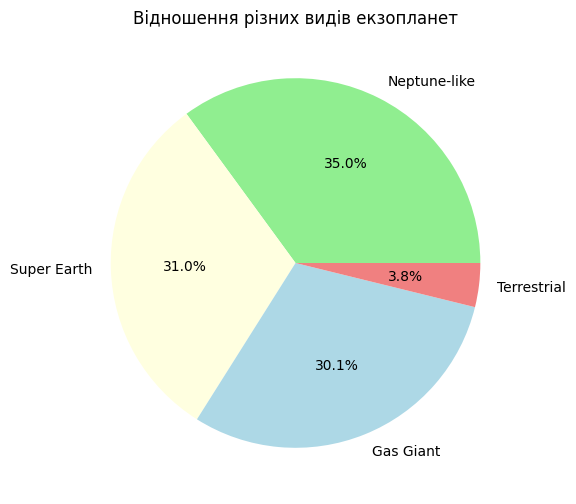

In [ ]:
sizes = [1670, 1477, 1435, 183]
labels11 = ['Neptune-like', 'Super Earth', 'Gas Giant', 'Terrestrial']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels11, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow', 'lightblue', 'lightcoral'])
plt.title("Відношення різних видів екзопланет")
plt.show()

З цієї діаграми можна побачити, що близько 65.1% всіх екзопланет, виявлених на даний час є  газовими гігантами та планетами, схожими на Нептун ( атмосфера здебільшого складається з гідрогену та гелію, а поверхня вкладається з замерзлої води, амоніаку та метану). А планети, що можуть бути схожими на Землю, є інші 44.9%.

In [ ]:
df["radius"] = np.where(df["radius_wrt"] == "Earth", 6378*df["radius_multiplier"], 71492*df["radius_multiplier"])

df["mass"] = np.where(df["mass_wrt"] == "Earth", 5.972*10**24*df["mass_multiplier"], 1.898*10**27*df["mass_multiplier"])

df

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,radius,mass
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity,77211.360,3.682120e+28
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity,77926.280,2.797652e+28
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity,82215.800,9.110400e+27
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity,80071.040,1.544746e+28
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity,85790.400,3.378440e+27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit,98158.516,1.345682e+27
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging,81500.880,1.195740e+28
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity,5823.114,4.180400e+24
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity,6696.900,6.808080e+24


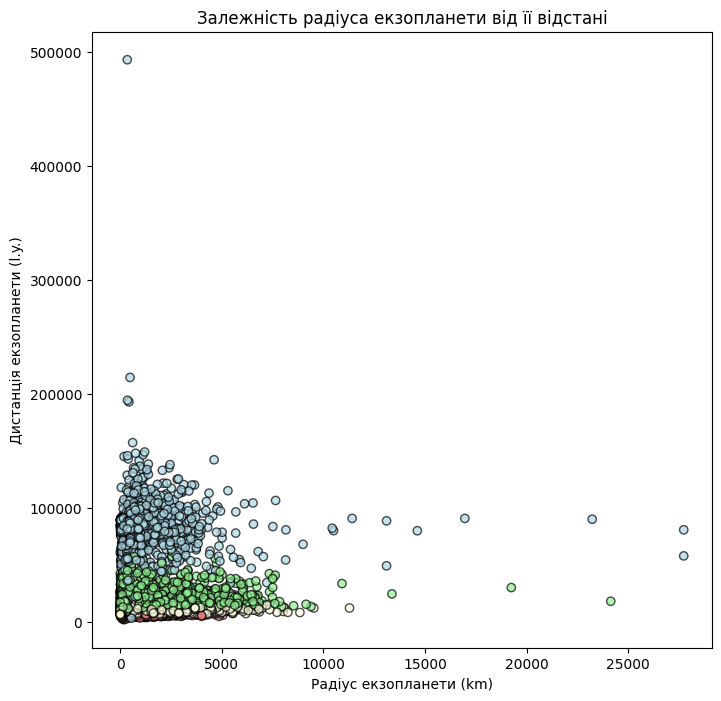

In [ ]:
plt.figure(figsize=(8,8))
colors={'Neptune-like':'lightgreen','Gas Giant': 'lightblue', 'Terrestrial': 'lightcoral', 'Super Earth': 'lightyellow'}
plt.scatter(df['distance'], df['radius'],
            c = df['planet_type'].map(colors).fillna('gray'),  alpha=0.7, edgecolor='black')
plt.title("Залежність радіуса екзопланети від її відстані")
plt.xlabel("Радіус екзопланети (km)")
plt.ylabel("Дистанція екзопланети (l.y.)")
plt.show()



Тут добре видно, що землеподібні екзопланети (Terrestrial exoplanets) мають найменший радіус та найближчу дистанцію до Землі, а газові гіганти, не зважаючи на те, щомають схожий радіус планети, проте знаходяться, в середньому, за 40000 світлових років від Землі. Але більшість планет, включаючи Супер-Землі та Нептуноподібні планети знаходяться майже на одній відстані від нашої планети.

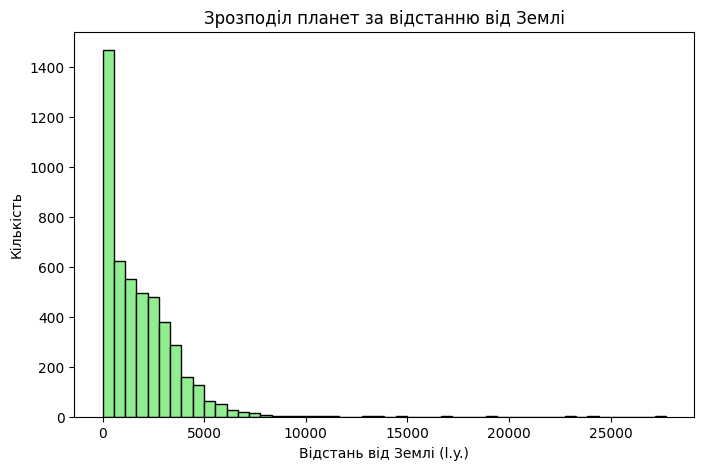

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['distance'], bins=50, color='lightgreen', edgecolor='black')
plt.title("Зрозподіл планет за відстанню від Землі")
plt.xlabel("Відстань від Землі (l.y.)")
plt.ylabel("Кількість")
plt.show()

У цьому графіку ми бачимо підтвердження попереднього твердження про кількість планет, які знаходяться відносно близько до Землі. Бліьше ніж 1400 екзопалнет знаходяться на відстані до 600 світлових років від Землі.

In [ ]:
distance_by_type = df.groupby("planet_type")["orbital_radius"].mean()
distance_by_type

,orbital_radius
planet_type,
Gas Giant,21.653278
Neptune-like,0.195680
Super Earth,0.100919
Terrestrial,0.055139


In [ ]:
df1 = df[df["mass"] < 15*10**24]
df1

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,radius,mass
134,EPIC 201170410.02,437.0,17.6984,Super Earth,2020,1.150,Earth,1.047,Earth,0.03490,0.018617,0.00,Transit,6677.766,6.867800e+24
141,EPIC 201757695.02,1884.0,14.9740,Terrestrial,2020,0.688,Earth,0.908,Earth,0.02960,0.005476,0.00,Transit,5791.224,4.108736e+24
143,EPIC 201841433 b,1424.0,14.9830,Super Earth,2019,1.120,Earth,1.040,Earth,0.03500,0.011499,0.00,Transit,6633.120,6.688640e+24
181,G 264-012 b,52.0,13.0780,Super Earth,2021,2.500,Earth,1.390,Earth,0.02279,0.006297,0.00,Radial Velocity,8865.420,1.493000e+25
191,GJ 1002 b,16.0,13.7600,Super Earth,2022,1.080,Earth,1.030,Earth,0.04570,0.028200,0.00,Radial Velocity,6569.340,6.449760e+24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,TRAPPIST-1 h,41.0,17.0200,Terrestrial,2017,0.326,Earth,0.755,Earth,0.06189,0.051472,0.01,Transit,4815.390,1.946872e+24
5230,Wolf 1061 b,14.0,10.1000,Super Earth,2015,1.910,Earth,1.210,Earth,0.03750,0.013415,0.15,Radial Velocity,7717.380,1.140652e+25
5247,YZ Ceti b,12.0,12.0740,Terrestrial,2017,0.700,Earth,0.913,Earth,0.01634,0.005476,0.06,Radial Velocity,5823.114,4.180400e+24
5248,YZ Ceti c,12.0,12.0740,Super Earth,2017,1.140,Earth,1.050,Earth,0.02156,0.008487,0.00,Radial Velocity,6696.900,6.808080e+24


In [ ]:
df2 = df1[df1["orbital_period"] <= 1.5]
df2

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,radius,mass
134,EPIC 201170410.02,437.0,17.6984,Super Earth,2020,1.150,Earth,1.047,Earth,0.03490,0.018617,0.00,Transit,6677.766,6.867800e+24
141,EPIC 201757695.02,1884.0,14.9740,Terrestrial,2020,0.688,Earth,0.908,Earth,0.02960,0.005476,0.00,Transit,5791.224,4.108736e+24
143,EPIC 201841433 b,1424.0,14.9830,Super Earth,2019,1.120,Earth,1.040,Earth,0.03500,0.011499,0.00,Transit,6633.120,6.688640e+24
181,G 264-012 b,52.0,13.0780,Super Earth,2021,2.500,Earth,1.390,Earth,0.02279,0.006297,0.00,Radial Velocity,8865.420,1.493000e+25
191,GJ 1002 b,16.0,13.7600,Super Earth,2022,1.080,Earth,1.030,Earth,0.04570,0.028200,0.00,Radial Velocity,6569.340,6.449760e+24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,TRAPPIST-1 h,41.0,17.0200,Terrestrial,2017,0.326,Earth,0.755,Earth,0.06189,0.051472,0.01,Transit,4815.390,1.946872e+24
5230,Wolf 1061 b,14.0,10.1000,Super Earth,2015,1.910,Earth,1.210,Earth,0.03750,0.013415,0.15,Radial Velocity,7717.380,1.140652e+25
5247,YZ Ceti b,12.0,12.0740,Terrestrial,2017,0.700,Earth,0.913,Earth,0.01634,0.005476,0.06,Radial Velocity,5823.114,4.180400e+24
5248,YZ Ceti c,12.0,12.0740,Super Earth,2017,1.140,Earth,1.050,Earth,0.02156,0.008487,0.00,Radial Velocity,6696.900,6.808080e+24


In [ ]:
df3 = df2[df2["radius"] <= 9567]
df3

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,radius,mass
134,EPIC 201170410.02,437.0,17.6984,Super Earth,2020,1.150,Earth,1.047,Earth,0.03490,0.018617,0.00,Transit,6677.766,6.867800e+24
141,EPIC 201757695.02,1884.0,14.9740,Terrestrial,2020,0.688,Earth,0.908,Earth,0.02960,0.005476,0.00,Transit,5791.224,4.108736e+24
143,EPIC 201841433 b,1424.0,14.9830,Super Earth,2019,1.120,Earth,1.040,Earth,0.03500,0.011499,0.00,Transit,6633.120,6.688640e+24
181,G 264-012 b,52.0,13.0780,Super Earth,2021,2.500,Earth,1.390,Earth,0.02279,0.006297,0.00,Radial Velocity,8865.420,1.493000e+25
191,GJ 1002 b,16.0,13.7600,Super Earth,2022,1.080,Earth,1.030,Earth,0.04570,0.028200,0.00,Radial Velocity,6569.340,6.449760e+24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,TRAPPIST-1 h,41.0,17.0200,Terrestrial,2017,0.326,Earth,0.755,Earth,0.06189,0.051472,0.01,Transit,4815.390,1.946872e+24
5230,Wolf 1061 b,14.0,10.1000,Super Earth,2015,1.910,Earth,1.210,Earth,0.03750,0.013415,0.15,Radial Velocity,7717.380,1.140652e+25
5247,YZ Ceti b,12.0,12.0740,Terrestrial,2017,0.700,Earth,0.913,Earth,0.01634,0.005476,0.06,Radial Velocity,5823.114,4.180400e+24
5248,YZ Ceti c,12.0,12.0740,Super Earth,2017,1.140,Earth,1.050,Earth,0.02156,0.008487,0.00,Radial Velocity,6696.900,6.808080e+24


Попередніми трьома таблицями я відсортувала всі екзопланети, що мають схожі показники маси, радіусу планети та радіус орбіти, за якою вони обертаються навколо їхніх зір. Таким чином підходящими під встановлені параметри залищається 631 екзопланета.

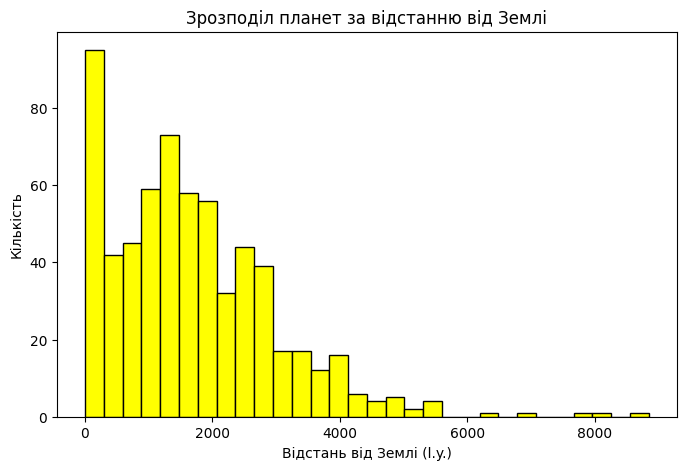

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df3['distance'], bins=30, color='yellow', edgecolor='black')
plt.title("Зрозподіл планет за відстанню від Землі")
plt.xlabel("Відстань від Землі (l.y.)")
plt.ylabel("Кількість")
plt.show()

З цього графіку можна побачити, що близько 365 екзопланет знаходяться на відстані до 2000 світових років від Землі. Що складає 57% від усіх Землеподібних екзопланет. А близько 100 планет знаходяться на відстані до 280 світових років від нашої планети.

## Висновки


*  Більше ніж 1400 екзопланет знаходяться на відстані до 600 світових років від Землі.
*  Є 44.9% планет, що характеризуються як Землеподібні екзопланети та Супер-Землі. З них 631 екзопланета має схожі характеристки на земні.


*   З 631 планети близько 365 знаходяться на відстані до 2000 світових років від Землі.

Дане дослідження дало можливість зрозуміти наскільки близькими, або ж далекми є екзопланети, які відомі науковцям на сьогоднішньому етапі. Також проаналізувати схожість їх з Землею та відстані, на яких вони знаходяться від нашої планети. Таке дослідження дає підгрунтя вважати, що на цих планетах може бути позаземне життя у будя-якій формі.





